
## N-gram basert på dewey

I tillegg til 

In [1]:
import dhlab.nbtext as nb
import pandas as pd
import dhlab.module_update as mu

In [1]:
mu.update('dhlab_v2')
import dhlab_v2 as d2

NameError: name 'mu' is not defined

In [2]:
!curl -i https://raw.githubusercontent.com/yoonsen/modules/master/dhlab_v2.py > dhlab_v2.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3934  100  3934    0     0  10035      0 --:--:-- --:--:-- --:--:-- 10035


In [13]:
import imp

In [22]:
imp.reload(d2)

<module 'dhlab_v2' from 'C:\\Users\\larsj\\documents\\GitHub\\ngram\\dhlab_v2.py'>

In [3]:
mu.css()

In [4]:
nb.dewey('610')

{'1': ['6', 'Teknologi'],
 '2': ['61', 'Medisin og helse'],
 '3': ['610', 'Medisin og helse']}

# Råfrekvenser unigram

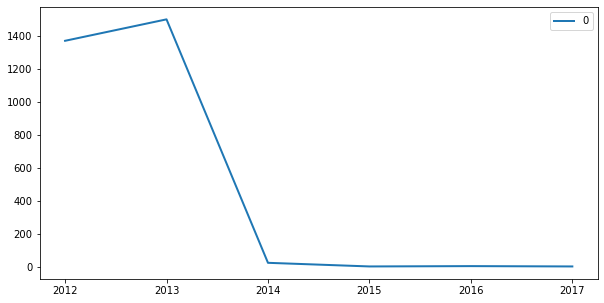

In [20]:
nb.unigram('likestilling', period = (2012, 2020)).plot(lw=2, figsize=(10,5))

# Bigram

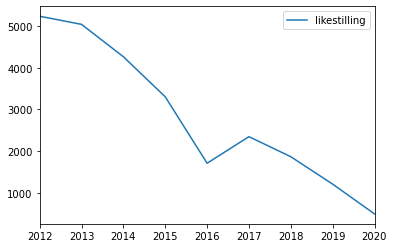

In [21]:
d2.ngram_book("likestilling", period = (2012, 2020)).plot()

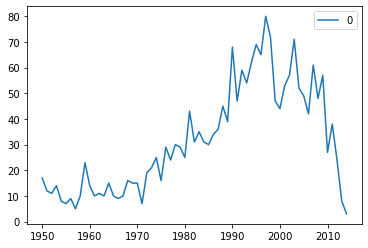

In [14]:
nb.bigram('meslinger','og').plot()

In [7]:
kohort_acc = "meg ham deg oss dem dere henne hverandre"
kohort = "jeg du han hun vi de"

In [8]:
def uni(x):
    df = nb.unigram(x, period=(1930, 2010))
    df.columns = [x]
    return df

In [9]:
def compare(kohort):
    df = pd.concat(map(uni, kohort), axis=1)
    dfsum = df.sum(axis=1)
    return pd.concat([ (df[x]/(dfsum)).rename(x) for x in df], axis=1)

In [10]:
comp_kohort = compare(kohort.split())

In [11]:
comp_acc = compare(kohort_acc.split())

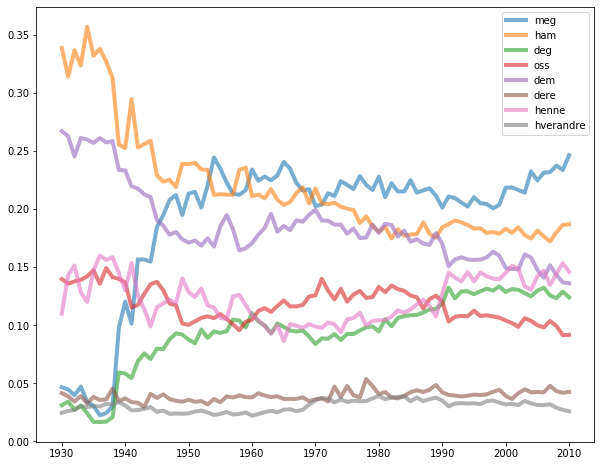

In [12]:
comp_acc.plot(figsize = (10,8), lw = 4, alpha=.6)

In [21]:
c = lambda x: pd.concat([nb.frame(nb.unigram(w, period=(1600, 2000)), w) for w in [y.strip() for y in x.split(",")]], axis=1)

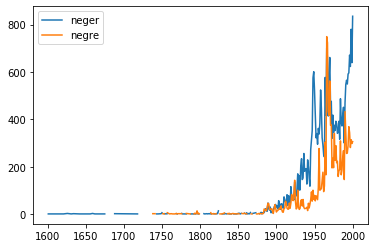

In [26]:
c('neger, negre').plot()

In [ ]:
- Hødnebø 1960 (Norske diplomer til og med år 1300),
- Hødnebø 1966 (Utvalg av norske diplomer 1350--1550),
- Rindal og Halvorsen 2009 (Middelalderbrev fra Ringerike 1263--1570).

In [33]:
nb.book_urn(author = "%HALVORSE%rindal%")

[]

In [35]:
urns = [2009090904028,2011031520003,2016011948059]

In [36]:
nb.metadata(urns)

[[2009090904028,
  '',
  1960,
  'Norske diplomer til og med år 1300',
  '',
  'Selskapet til utgivelse av gamle norske håndskrifter',
  'notfiction',
  '654f28fb0a30617ed98e1a6d4776b66c',
  'mul',
  ''],
 [2016011948059,
  '',
  2009,
  'Middelalderbrev fra Ringerike 1263-1570',
  'originaltekster med oversettelse til moderne norsk',
  'Kolltopp forl.',
  'notfiction',
  'abd2091d1098a8e63691c7a63e921b93',
  'nob',
  '']]

In [39]:
nb.urn_concordance(urns=urns, word="kirken", size=20)

"Norske diplomer til og med år 1300, , 1960",minst kampen og uroen innen,kirken,selv .
"Norske diplomer til og med år 1300, , 1960",herre Bjarne Erlingssons framferd mot,kirken,. Herre Bjarne hadde gått
"Norske diplomer til og med år 1300, , 1960","11 ) , nemlig at",kirken,skulle få sine tiender og
"Norske diplomer til og med år 1300, , 1960",av brevene vedrører innbyrdes-striden i,kirken,", den slo ut særlig"
"Norske diplomer til og med år 1300, , 1960",", nå er kommet under",kirken,", og forbyr bøndene på"
"Norske diplomer til og med år 1300, , 1960","i Oslo , mot at",kirken,får en del andre gårder
"Norske diplomer til og med år 1300, , 1960",til korsbrødrene å rå for,kirken,under erkestolens vakans .
"Norske diplomer til og med år 1300, , 1960",med en halvdel hver til,kirken,"og korsbrødrene , for at"
"Norske diplomer til og med år 1300, , 1960",ved Laf r anz -,kirken,"i Tønsberg , gir en"
"Norske diplomer til og med år 1300, , 1960",", hadde skjenket jorda til",kirken,", og mot at gårdens"
"Norske diplomer til og med år 1300, , 1960",hadde testamentert av gården Vollißennebutil,kirken,og korsbrødrene .
